<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 2</center></b><h2>
<h3><b><center>Sistemas Jerárquicos de N-cuerpos</center></b><h3>
<h5><center><b>Asignada</b>: 29 de Agosto de 2023</center><h5>
<h5><center><b>Entrega</b>: 12 de Septiembre de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Sebastián Numpaque
<br/>
<b>Cédula</b>: 1002396960
<br/>
<b>Última actualización</b>: 11/09/2023
<hr/>

In [ ]:
!pip install -q pymcel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 25.2 MB/s eta 0:00:00


In [ ]:
import pymcel as mc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner a prueba la idea de que es posible simular un  sistema de N-cuerpos jerarquicos usando un *árbol* de sistemas de 2 cuerpos.

En particular compararemos la predicción de las posiciones que para un sistema múltiple de estrellas nos da la simulación con un sistema jerárquico y el mismo resultado pero calculado como si el sistema fuera un sistema de N cuerpos completo.

**Procedimiento**:

El sistema que simularemos es el de un sistema binario formado por dos estrellas "s" y "e".  Alrededor de la estrella "e" gira un planeta "p", a cuyo alrededor, a su vez, gira una luna "L".  Los datos de los cuerpos, dados en unidades canónicas, en las que $U_M = 80$ M$_{\rm Jup}$, $U_L = 0.01$ au, son.

- Masas: s = 1, e = 0.5, L = 0.001, p = 0.01.

- Condiciones iniciales (las posiciones están dadas respecto al cuerpo más masivo de cada subsistema):

   - Sistema p-L:
     - Posición inicial de p : r = [0,0,0]
     - Velocidad inicial de p: v = [0,0,0]
     - Posición inicial de L: r = [0.03,0,0]
     - Velocidad inicial de L: v = [0,0.4,0.1]

   - Sistema e-pL (baricentro de p y L):
     - Posición inicial de e : r = [0,0,0]
     - Velocidad inicial de e: v = [0,0,0]
     - Posición inicial de pL: r = [0,0.4,0]
     - Velocidad inicial de pL: v = [0.9,0,0.2]
     
  - Sistema s-epL (baricentro e y pL):
     - Posición inicial de s : r = [0,0,0]
     - Velocidad inicial de s: v = [0,0,0]
     - Posición inicial de epL: r = [2,3,0]
     - Velocidad inicial de epL: v = [-0.2,0.7,0]



Una vez definidas las condiciones iniciales:

1. Dibujar el árbol del sistema jerárquico como lo hicimos en clase.

2. Simular usando `ncuerpos_solucion` cada subsistema por separado y obtener el vector y la velocidad relativa como función del tiempo de cada subsistema. Para el tiempo total de simulación encuentre el período orbital de cada subsistema ¿cuánto es?. El tiempo de la simulación será igual al período más largo.

3. Suponiendo que el centro de masa de todo el sistema está en reposo en el origen, calcular a partir la solución al problema relativo de cada subsistema, la posición de cada cuerpo en el tiempo.

4. Haga gráficos de las posiciones y una animación que muestre la trayectoria de las partículas.

5. Tomando las posiciones iniciales calculadas en 3, use otra vez `ncuerpos_solucion` para encontrar las posiciones y velocidades de todas las partículas respecto del centro de masa. Haga un gráfico de la solución obtenida y cálcule con el obtenido en 4. ¿Se ven parecidas?

6. Haga gráficos de las componentes x, y, z de la posición de cada partícula del sistema a lo largo del tiempo, calculadas con la aproximación jerárquica (punto 3) y con la solución al sistema completo (punto 5). Un gráfico por cuerpo. Comente su resultado.

7. Haga gráficos de la energía cinética total, la energía potencial total y la energía mecánica total como función del tiempo usando los resultados en 3. El gráfico debe expresarse en unidades más convencionales: en el eje x el tiempo en días,  en el eje y la energía en Joules. ¿Qué observa?

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos solicitados en cada punto.

- Datos mínimos:
  - Números solicitados en cada punto.

- Gráficos opcionales:
  - Animación mostrando el movimiento de una de las partículas, predicho con la aproximación jerarquica y con la integración precisa.

  - Gráfico de la energía cinética, potencial y total para la simulación de N-cuerpos (punto 5).

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.



---



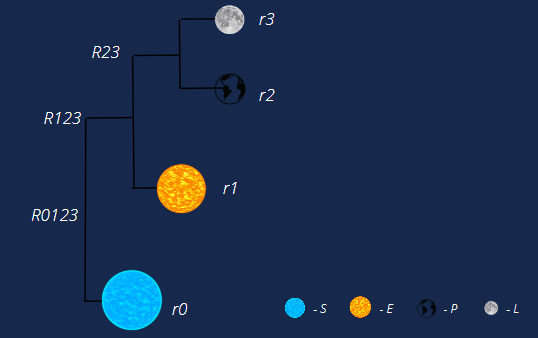

#**Solución**

Desde el análisis dimensional, se establece la unidad canónica de tiempo,$\mathcal{U}_T$, de la siguiente forma.

$$\mathcal{U}_L=0.01\,AU=1.5\times 10^9m\hspace{1cm} \mathcal{U}_M=80\,M_{Jup}=151.84\times 10^{27}\, kg\hspace{1cm}G=6.67\times 10^{11}\,m^3/kg\,s^2$$

$$\mathcal{U}_T=\sqrt{\frac{\mathcal{U}_L^3}{G\mathcal{U}_M}}$$

Con este sistema de unidades, la unidad de tiempo equivale a $\mathcal{U}_T\simeq5.071\, h$. Este valor se interpreta como la cantidad de tiempo en la que un cuerpo ubicado a $1\,\mathcal{U}_L$ y con masa $1\,\mathcal{U}_M$ recorre una unidad angular de distancia ($1\, rad$)

In [ ]:
# @title
t_canon = (np.sqrt((1.5e9)**3 / (80*1.898e27*6.67e-11)))/3600
print(f"La unidad de tiempo canónica del sistema equivale a {round(t_canon, 3)} horas")

La unidad de tiempo canónica del sistema equivale a 5.071 horas


Se establecen los valores necesarios para solucionar cada uno de los sistemas.

In [ ]:
# @title
masas = np.array([1, 0.5, 0.01, 0.001])
cuerpos = np.array(["S", "E", "P", "L"])

#Posiciones iniciales, cada arreglo contiene las posiciones de cada sistema
r_0s = np.array([[np.zeros(3), [2, 3, 0]], #Sistema S-EPL
                 [np.zeros(3), [0, 0.4, 0]], #Sistema E-PL
                 [np.zeros(3), [0.03, 0, 0]]]) #Sistema P-L

#Velocidades iniciales, cada arreglo contiene las velocidades de cada sistema
v_0s = np.array([[np.zeros(3), [-0.2, 0.7, 0.0]], #Sistema S-EPL
                 [np.zeros(3), [0.9, 0, 0.2]], #Sistema E-PL
                 [np.zeros(3), [0, 0.4, 0.1]]]) #Sistema P-L

#**Explicación de la función**

La siguiente función soluciona cada uno de los sistemas aproximados de 2 cuerpos de forma iterada sobre el arbol jerarquico, desde el sistema más general (*S-EPL*) hasta el sistema más simple (*P-L*). Esta función puede resolver sistemas en los que su arbol presenta una unica ramificación, se debe generalizar para solucionar sobre distintas ramas del arbol.

En cada una de las iteraciones se resuelven las posiciones y velocidades del cuerpo principal en el sistema y del centro de masa del siguiente sistema a resolver; de este modo, en las siguientes iteraciones se cuenta con la información necesaria para resolver las posiciones y velocidades de los demás cuerpos involucrados.

El ciclo corre sobre el número de parejas que se forman (#*Cuerpos* $-$ *1*). Una consideración es que sobre la función se aplican dos condicionales; estos garantizan que el ciclo no sobrepase el número de posiciones disponibles en los arreglos donde se almacenan las soluciones. El primer condicional establece que se resuelvan todos los sistemas en el arbol a excepción del último, mientras que el ultimo condicional establece que se resuelva el último sistema.

In [ ]:
# @title
def aprox_2cuerpos(m_, r_, v_, n): #n: Numero de pasos
  R = np.zeros((3, n, 3), dtype = list) #Centros de masa de los sistemas, arreglo vacio que se irán llenando
  V = np.zeros((3, n, 3), dtype = list) #Velocidades de los centros de masa, arreglo vacío que se irá llenando
  t = np.linspace(0, 60, n)

  #Arreglos que contendran las soluciones
  rs = np.zeros(4, dtype = list)
  vs = np.zeros(4, dtype = list)
  r_rel = np.zeros(3, dtype = list)
  v_rel = np.zeros(3, dtype = list)

  #Corre sobre los sistemas del más general al más simple
  for i in range(len(m_)-1):

    #Masas de los sistemas
    mi = m_[i]
    mj = np.sum(m_[i+1:])

    #Toma las condiciones iniciales de cada sistema
    ri = r_[i,0]
    rj = r_[i,1]
    vi = v_[i,0]
    vj = v_[i,1]

    #Sistema a resolver
    sis_ij = [
        dict(m = mi, r = ri, v = vi),
        dict(m = mj, r = rj, v = vj)
    ]

    r_sol, v_sol, rp_sol, vp_sol, cuad = mc.ncuerpos_solucion(sis_ij, t) #Solucion del sistema
    r_ij = r_sol[0,:,:] - r_sol[1,:,:] #Vector relativo del sistema
    v_ij = v_sol[0,:,:] - v_sol[1,:,:] #Velocidad relativa del sistema
    r_rel[i] = r_ij
    v_rel[i] = v_ij

    #Condicion para resolver posiciones de cada cuerpo en el sistema hasta el penultimo
    if i < (len(m_) - 2):
      R[i+1] = R[i] - mi/(mi + mj)*r_ij #Centro de masa del sistema siguiente
      rs[i] = R[i] + mj/(mi + mj)*r_ij #Cuerpo r0 del sistema presente
      V[i+1] = V[i] - mi/(mi + mj)*v_ij #Centro de masa del sistema siguiente
      vs[i] = V[i] + mj/(mi + mj)*v_ij

    #Posiciones de cada cuerpo en el ultimo sistema
    elif i == len(m_) - 2:
      rs[i+1] = R[i] - mi/(mi + mj)*r_ij #Calculo de r2
      rs[i] = R[i] + mj/(mi + mj)*r_ij #Calculo de r1
      vs[i] = V[i] + mj/(mi + mj)*v_ij #Calculo de v1
      vs[i+1] = V[i] - mi/(mi + mj)*v_ij #Calculo de v2

  return rs, vs, r_rel, v_rel #Retorna posiciones y velocidades de los cuerpos y sus vectores relativos en cada sistema

#**Ejecución**

Durante la ejecución de las soluciones, se observó que un periodo para el cuál las órbitas se cerraban era de $\sim60\,\mathcal{U}_T$ para el sistema *S-EPL*. En los sistemas *E-PL* y *P-L* estos periodos serán menores.

Acá realizamos la ejecución de las soluciones por aproximación de *2 Cuerpos* y de *N-Cuerpos*

In [ ]:
# @title
n_pasos = 1000

#Ejecución de la función de aproximación de solución por 2 Cuerpos
rs, vs, rs_rel, vs_rel = aprox_2cuerpos(masas, r_0s, v_0s, n_pasos)

#Solución de N-Cuerpos
t = np.linspace(0, 60, n_pasos)
sistema = [dict(m = masas[i], r = rs[i][0], v = vs[i][0]) for i in range(4)]
rs_n, vs_n, rps_n, vps_n, cuad_n = mc.ncuerpos_solucion(sistema, t)

En esta sección mostramos las componentes de posición y velocidad del vector relativo correspondientes al sistema *S-EPL*. Puede observar estos datos para el sistema que desee, cambiando el indice de los arreglos en la celda.

In [ ]:
# @title
#DataFrame con las posiciones y velocidades relativas
#Puede observar los datos para cualquier sistema cambiando el indice en rs_rel y vs_rel
pd.DataFrame(np.concatenate((rs_rel[0], vs_rel[0]), axis = 1), columns = ["X", "Y", "Z","Vx", "Vy", "Vz"])

,X,Y,Z,Vx,Vy,Vz
0,-2.000000,-3.000000,0.0,0.200000,-0.700000,0.0
1,-1.987873,-3.041868,0.0,0.203816,-0.694219,0.0
2,-1.975520,-3.083391,0.0,0.207521,-0.688494,0.0
3,-1.962948,-3.124571,0.0,0.211118,-0.682823,0.0
4,-1.950162,-3.165413,0.0,0.214613,-0.677206,0.0
...,...,...,...,...,...,...
995,-0.817855,-5.269644,0.0,0.317949,-0.396793,0.0
996,-0.798744,-5.293381,0.0,0.318430,-0.393651,0.0
997,-0.779605,-5.316930,0.0,0.318894,-0.390531,0.0
998,-0.760439,-5.340292,0.0,0.319342,-0.387432,0.0


#**Simulación**

Debido al tiempo que tarda en crearse la simulación, se decide no crear estas visualizaciones.

#**Graficos**

Se puede apreciar que a simple vista no hay diferencias notables, si quiera minusculas, entre la solución de aproximación de *2 cuerpos* y de *N - cuerpos*.

Se deja abierta la discusión sobre qué método es mejor a la hora de resolver sistemas jerarquicos pues se debe observar las diferencias númericas de cada solución. Aún así, este es un primer indicio de la factibilidad del método de *2 cuerpos*.

Text(0.5, 0, '$\\mathcal{u}_{\\,L}$')

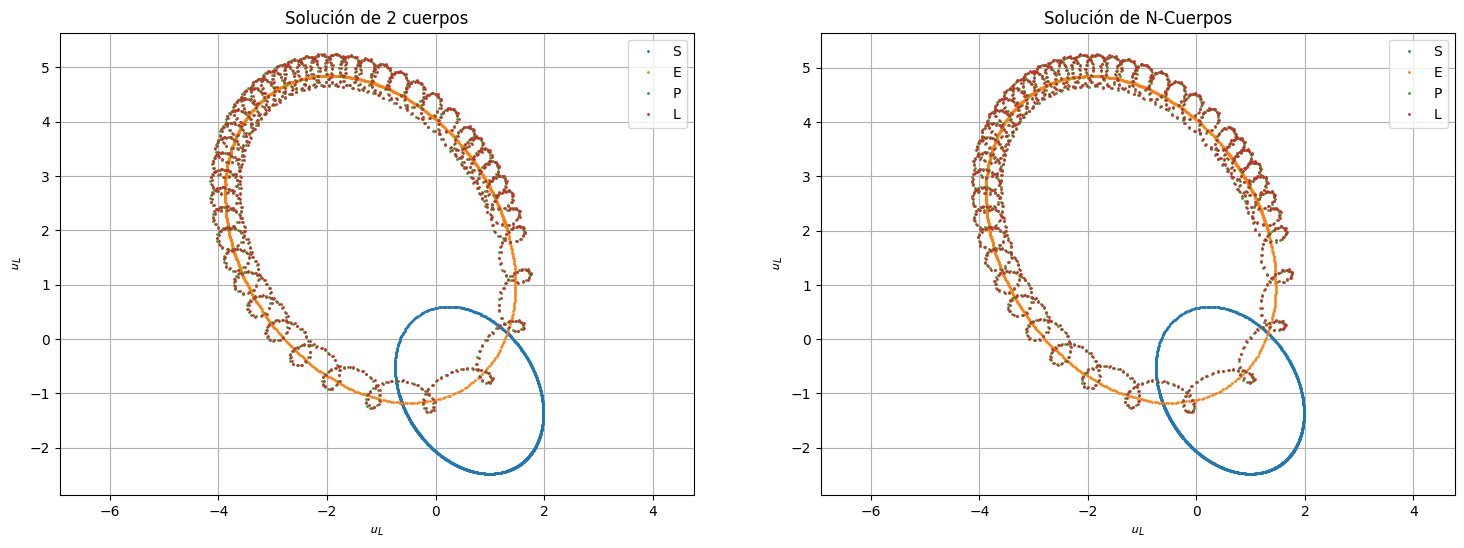

In [ ]:
# @title
fig = plt.figure(figsize = (18,6))

plt.subplot(1, 2, 1)
for i in range(4):
  plt.plot(rs[i][:,0], rs[i][:,1], "o", markersize = 1)
plt.legend(labels = cuerpos)
plt.grid(True)
plt.title("Solución de 2 cuerpos")
plt.axis("equal")
plt.ylabel("$\mathcal{u}_{\,L}$")
plt.xlabel("$\mathcal{u}_{\,L}$")

plt.subplot(1, 2, 2)
for i in range(4):
  plt.plot(rps_n[i][:,0], rps_n[i][:,1], "o", markersize = 1)
plt.legend(labels = cuerpos)
plt.grid(True)
plt.title("Solución de N-Cuerpos")
plt.axis("equal")
plt.ylabel("$\mathcal{u}_{\,L}$")
plt.xlabel("$\mathcal{u}_{\,L}$")

#**Análisis Númerico**

Anteriormente observamos la similitud del movimiento en cada una de las soluciones. Aquí observaremos las diferencias númericas que pueden ocurrir. Estos errores se calculan como la diferencia respecto a la solución de *N-Cuerpos*, que se considera como la solución apropiada del problema.

En el grafico que se muestra, se puede observar como las curvas respectivas se sobreponen por lo que podríamos pensar en primera instancia que la aproximación de *2Cuerpos* es equiparable a la solución *N-Cuerpos*.

En el DataFrame que se visualiza celdas abajo, se observa como el error va en incremento para cada una de las componentes de posición de los cuerpos a medida que aumenta el tiempo de simulación. Esto nos indica que el método de solución por aproximación para dos cuerpos propaga el error con el tiempo

Del grafico de errores se observa que estos errores llegan a diferir desde el primer decimal. Un primer decimal para las unidades de longitud que tenemos, representa $0.1\,\mathcal{U}_T=0.001\,AU\simeq10^8 \,m$. Discrepancias de miles de millones de metros en la posición de un cuerpo son garrafales si se piensa en una misión espacial a este sistema. La distancia *Tierra - Luna* es del orden de $10^8 \,m$, tomar esta aproximación de 2Cuerpos sería errar en miles de veces la distancia *Tierra - Luna*

A partir de la primera iteración ya se tiene un error desde el cuarto decimal para el cuerpo *P* y *L*, lo que refleja una diferencia de posición por componentes de $10^5 m$. Para los cuerpos *S* y *E* se discrepa desde la septima cifra que equivale a $10^2 m$ y esta diferencia ya se puede tomar como despreciable y corregible en el caso de misiones espaciales.

Podemos concluir que el método más apropiado para solucionar con precisión este sistema, y en general cualquier sistema, es *N-Cuerpos*. La aproximación de *2Cuerpos* es apropiada como forma de visualizar de forma general el comportamiento de un sistema jerarquico,  o cuando se desea solucionar en tiempos de simulación cortos.



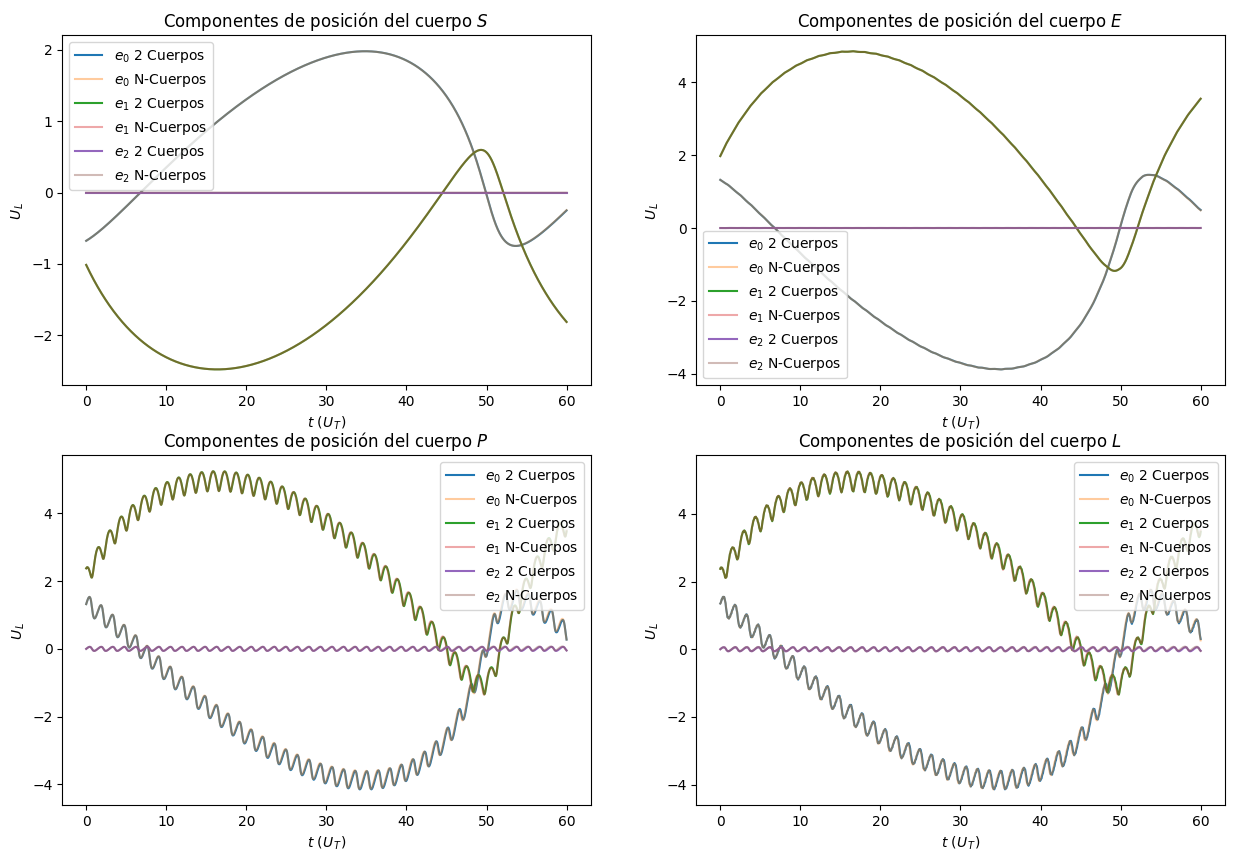

In [ ]:
# @title
plt.figure(figsize = (15,10))
for j in range(4):
  plt.subplot(2, 2, j + 1)
  plt.title(f"Componentes de posición del cuerpo ${cuerpos[j]}$")
  for i in range(3):
    plt.plot(t, rs[j][:,i], label = f"$e_{i}$ 2 Cuerpos")
    plt.plot(t, rps_n[j][:,i], alpha = 0.4, label = f"$e_{i}$ N-Cuerpos")
  plt.legend()
  plt.xlabel("$t$ $(U_{\,T})$")
  plt.ylabel("$U_{\,L}$")

Acá calculamos las diferencias entre las componentes de posición de cada cuerpo, que se obtuvieron por la aproximación de *2 Cuerpos* y *N-Cuerpos*

In [ ]:
# @title
error = np.zeros(4, dtype = list) #Cada entrada para cada cuerpo
for i in range(4):
    error[i] = rps_n[i] - rs[i]

#Diferencia númerica entre la solución de 2Cuerpos y N-Cuerpos para cada cuerpo
pd.DataFrame(np.concatenate((error[0], error[1], error[2], error[3]), axis = 1),
             columns = ["Error Xs", "Error Ys", "Error Zs",
                        "Error Xe", "Error Ye", "Error Ze",
                        "Error Xp", "Error Yp", "Error Zp",
                        "Error Xl", "Error Yl", "Error Zl"])

,Error Xs,Error Ys,Error Zs,Error Xe,Error Ye,Error Ze,Error Xp,Error Yp,Error Zp,Error Xl,Error Yl,Error Zl
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.0,-0.000001,-0.0,-0.0,0.000052,0.000003,0.000003,-0.000304,0.000164,-0.000029
2,0.0,0.0,-0.0,-0.000002,-0.000002,0.0,0.000228,0.000199,0.000014,-0.001478,-0.001231,-0.00014
3,0.0,0.0,-0.0,-0.000004,-0.000004,0.0,0.000157,0.000329,0.000024,0.000157,-0.001475,-0.000238
4,0.0,0.0,-0.0,-0.000007,-0.000008,0.0,0.000276,0.000138,-0.000027,0.000273,0.002042,0.000277
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.004173,-0.002234,-0.00043,-0.008197,0.004687,0.001026,-0.007762,-0.012754,-0.008897,0.002871,0.017887,0.005982
996,0.004188,-0.002209,-0.000433,-0.00821,0.00442,0.001043,-0.003798,-0.002443,-0.007935,-0.044627,0.02318,-0.009492
997,0.004202,-0.002183,-0.000435,-0.008241,0.004179,0.001015,-0.005263,0.010432,-0.005301,-0.029064,-0.010498,-0.019109
998,0.004216,-0.002158,-0.000438,-0.00829,0.003912,0.000944,-0.005713,0.015281,-0.004168,-0.01423,0.048969,0.007531


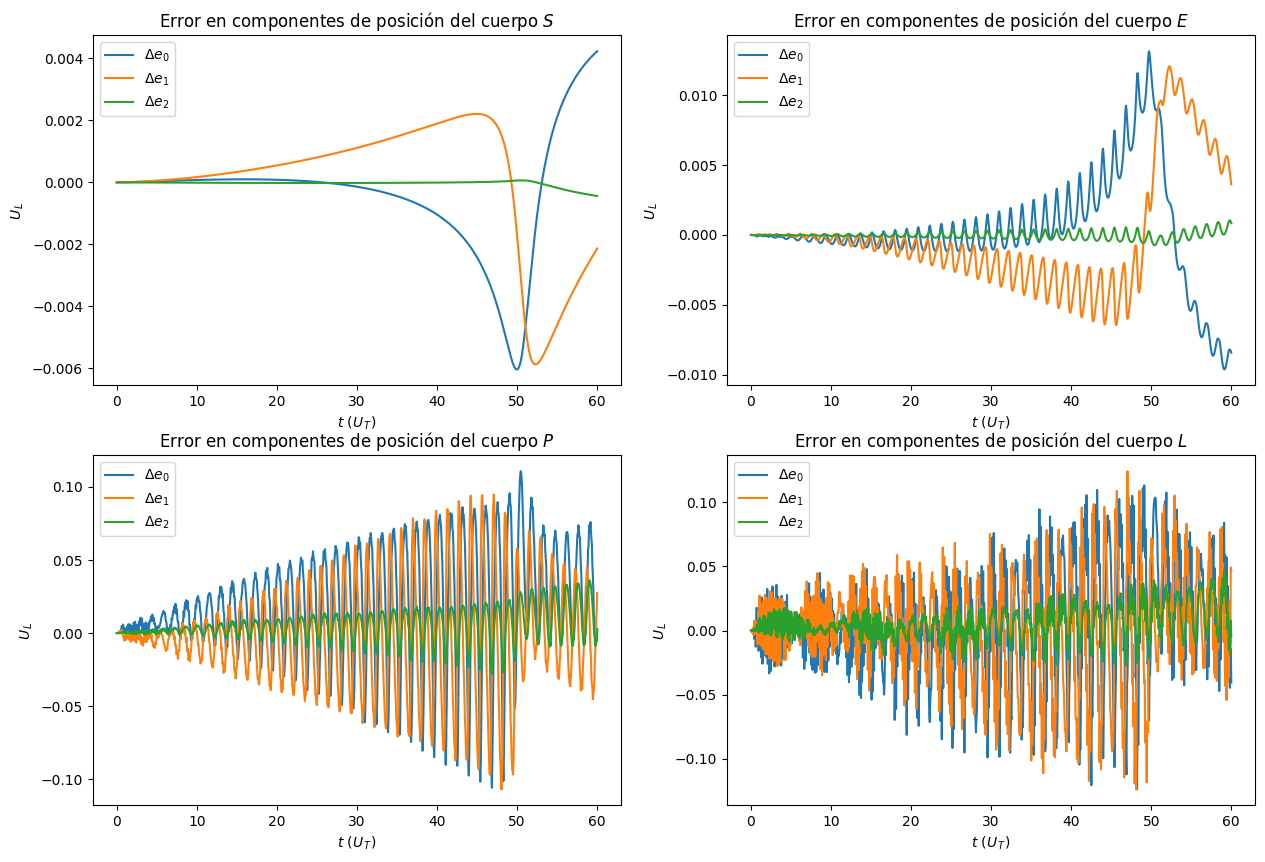

In [ ]:
# @title
plt.figure(figsize = (15,10))
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.title(f"Error en componentes de posición del cuerpo ${cuerpos[i]}$")
  for j in range(3):
    plt.plot(t, error[i][:, j], label = f"$\Delta e_{j}$")
  plt.legend()
  plt.xlabel("$t$ $(U_{\,T})$")
  plt.ylabel("$U_{\,L}$")

#**Energías**

Similarmente, en primer acercamiento no se aprecian discrepancias en las curvas de energía entre los dos métodos de solución. Igualmente se puede visualizar sin mucho esfuerzo la satisfacción del *Teorema del Virial*. La solución de aproximación de *2Cuerpos* satisface el valor del virial calculado por *N-Cuerpos* y sus valores discrepan a partir de la quinta cifra decimal; esto da un indicio de buena aproximación de solución de energías.

Aún así, veamos las diferencias númericas a continuación:

En la sección anterior vimos como el error se propagaba con el tiempo, por lo que es correcto pensar que el error en las energías también se propaga con el tiempo. Esto lo podemos verificar en la grafica y DataFrame que se encuentra celdas abajo. Las diferencias de energía van desde $10^{-6}$ hasta $10^{-2}$ en el sistema de unidades canónicas. En el sistema internacional de unidades, se tiene que la energía alcanza ordenes de $10^{38}$, por lo que la diferencia de energías alcanzaría ordenes desde $10^{36}$ hasta $10^{32}$ *Joules*.

Concluimos y reforzamos la afirmación que realizamos en la sección anterior: La solución por aproximación de *2Cuerpos* es buena cuando el tiempo de simulación es corto y se desea tener una perspectiva general de la evolución del sistema. Dependiendo de la precisión que se requiera, esta aproximación será suficiente o no.

En estas secciones calculamos las energías a partir de la solución del sistema por los dos métodos.

In [ ]:
# @title
#Calculo de energías para aproximación de 2Cuerpos
K_2 = []

for i in range(4): #Energia Cinetica en sus tres componentes para cada instante
  K_2.append(0.5*masas[i]*np.sum(vs[i]*vs[i], axis = 1))

K_2 = np.array(np.sum(K_2, axis = 0))

U_2 = 0
for i in range(4): #Energia potencial en cada instante
    for j in range(4):
      if j != i:
        r_ij = np.sum((rs[i]-rs[j])**2, axis = 1)**0.5
        U_2 += masas[i]*masas[j]/r_ij
U_2 *= -0.5

E_2 = K_2 + U_2

In [ ]:
# @title
t_d = np.linspace(0, 60*t_canon/24, n_pasos) #Conversión del tiempo de simulación de unidades canonicas a dias
joules = (80*1.898e27)*((1.5e9)**2)/(t_canon*3600)**2 #Conversión de unidad de energía de unidades canonicas a Joules

#Energías de N-Cuerpos
K_n = cuad_n["K"]
U_n = cuad_n["U"]
E_n = K_n + U_n

Acá mostramos las diferencias en las energías que se obtienen por los dos métodos de solución

In [ ]:
# @title
error_E = E_n - E_2
error_K = K_n - K_2
error_U = U_n - U_2

pd.DataFrame(list(zip(error_E, error_K, error_U)), columns = ["ΔE", "ΔK", "ΔU"])

,ΔE,ΔK,ΔU
0,0.000000,0.000000,0.000000
1,0.000010,0.000009,0.000001
2,0.000010,0.000012,-0.000003
3,0.000012,0.000008,0.000004
4,0.000009,-0.000129,0.000138
...,...,...,...
995,-0.000012,-0.001502,0.001490
996,-0.000029,-0.000573,0.000545
997,0.000006,0.000457,-0.000451
998,-0.000026,0.001256,-0.001281


In [ ]:
# @title
V_2 = 2*np.mean(K_2) - np.mean(U_2)
V_n = 2*np.mean(K_n) - np.mean(U_n)
delta_V = V_n - V_2
pd.DataFrame([V_2, V_n, delta_V], index = ["2Cuerpos", "N-Cuerpos", "ΔV"], columns = ["Virial"])

,Virial
2Cuerpos,0.248360
N-Cuerpos,0.248397
ΔV,0.000037


Text(0, 0.5, 'E ($Joules$)')

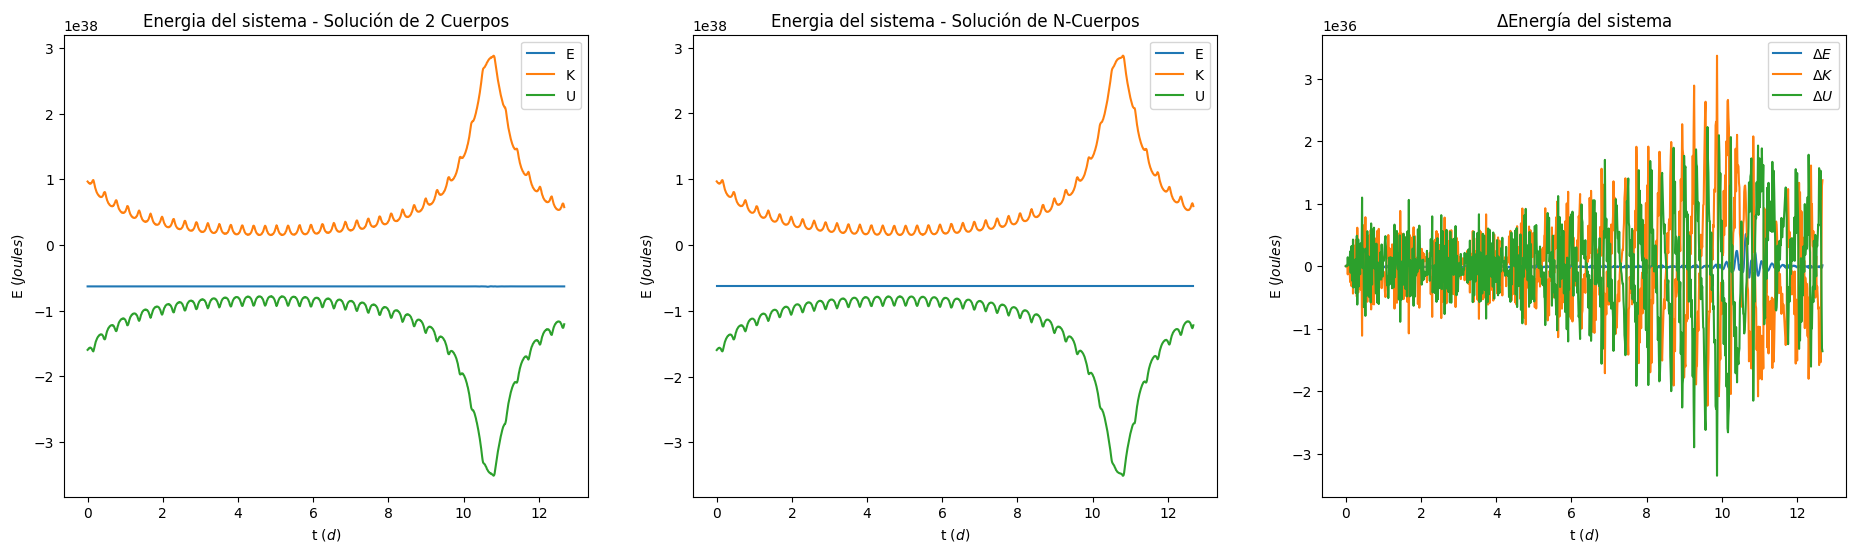

In [ ]:
# @title
plt.figure(figsize = (23,6))
plt.subplot(1, 3, 1)
plt.plot(t_d, E_2*joules, label = "E")
plt.plot(t_d, K_2*joules, label = "K")
plt.plot(t_d, U_2*joules, label = "U")
plt.legend()
plt.title("Energia del sistema - Solución de 2 Cuerpos")
plt.xlabel("t ($d$)")
plt.ylabel("E ($Joules$)")

plt.subplot(1, 3, 2)
plt.plot(t_d, E_n*joules, label = "E")
plt.plot(t_d, K_n*joules, label = "K")
plt.plot(t_d, U_n*joules, label = "U")
plt.legend()
plt.title("Energia del sistema - Solución de N-Cuerpos")
plt.xlabel("t ($d$)")
plt.ylabel("E ($Joules$)")

plt.subplot(1, 3, 3)
plt.plot(t_d, error_E*joules, label = "$\Delta E$")
plt.plot(t_d, error_K*joules, label = "$\Delta K$")
plt.plot(t_d, error_U*joules, label = "$\Delta U$")
plt.legend()
plt.title("$\Delta$Energía del sistema")
plt.xlabel("t ($d$)")
plt.ylabel("E ($Joules$)")